In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load data
data = pd.read_csv('/content/Cancer_Data.csv')

# Drop the 'id' column
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Convert 'diagnosis' to numerical values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


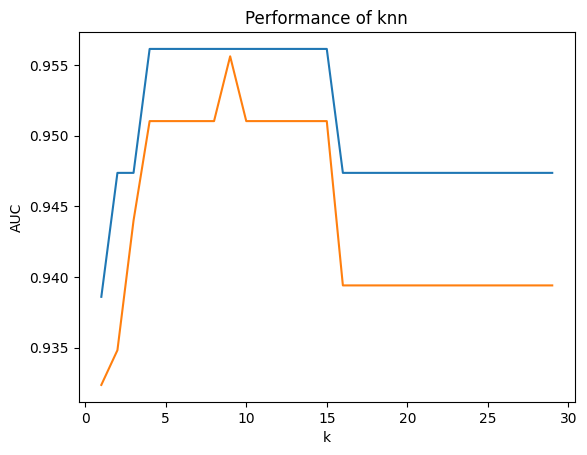

In [19]:
# Separating the features and the target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# KNN implementation
# calculate the Euclidean distance between two vectors
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        auc = roc_auc_score(y_test, y_pred)
        return accuracy, auc

accuracies = []
aucs = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)[0]
    auc = knn.evaluate(X_test, y_test)[1]
    accuracies.append(accuracy)
    aucs.append(auc)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
ax.plot(ks, aucs)
ax.set(xlabel="k",
       ylabel="AUC",
       title="Performance of knn")
plt.show()


In [16]:
accuracies

[0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

In [20]:
aucs

[0.9323616115296429,
 0.9348182115951523,
 0.9439895185063871,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9556174254831313,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9510317720275139,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697,
 0.9394038650507697]